In [47]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

In [48]:
alpha = 0.01
a0 = -12.7
#H2: a > a0
sigma0 = 3.5
#H3: sigma > sigma0
a1 = -11.9
#H1: a = a1
sigma1 = 3.8
eps = 0.1
n = 120

In [49]:
df = pd.read_csv("MS_5-6.csv", header=None, encoding='utf-8')

df.head()

,0
0,-24.076
1,-2.905
2,-7.380
3,-13.266
4,-10.997


(array([ 2.,  2.,  0.,  1.,  5., 17.,  9.,  9., 24., 18., 14., 12.,  2.,
         2.,  2.,  1.]),
 array([-24.076  , -22.63975, -21.2035 , -19.76725, -18.331  , -16.89475,
        -15.4585 , -14.02225, -12.586  , -11.14975,  -9.7135 ,  -8.27725,
         -6.841  ,  -5.40475,  -3.9685 ,  -2.53225,  -1.096  ]),
 <BarContainer object of 16 artists>)

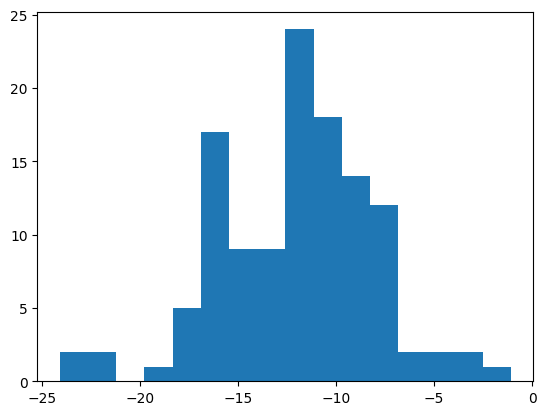

In [50]:
data = df.iloc[:, 0].to_numpy()
num_bins = int(1 + np.log(n)*3.32)
plt.hist(data, bins=num_bins)

In [51]:
sample_mean = np.mean(data)
sample_std = 1/(n - 1) * np.sum((data - sample_mean)**2)
print("sample mean:", sample_mean)
print("sample std:", sample_std)
print('крит мн-во: S = {sample_me_x > C}')
print('статистика: (sample_me_x - a) * sqrt(n) / sqrt(s_2) ~ t(n-1)')
C = a0 + stats.t.ppf(1 - alpha, n - 1) * np.sqrt(sample_std / n) 
print("C:", C)
if sample_mean > C:
    print("H0 отклонена, a > -12.7")
else:
    print("H0 принята, a = -12.7")

sample mean: -12.03045
sample std: 15.662343274789917
крит мн-во: S = {sample_me_x > C}
статистика: (sample_me_x - a) * sqrt(n) / sqrt(s_2) ~ t(n-1)
C: -11.848080432815411
H0 принята, a = -12.7


In [52]:
print('крит мн-во: S = {s_2 > C}')
print('статистика: s_2 * (n - 1) / sigma^2 ~ Chi2(n-1)')

C = stats.chi2.ppf(1 - alpha, n - 1) * sigma0**2 / (n - 1)
print(C)
if sample_std > C:
    print("H0 отклонена, sigma > 3.5")
else:
    print("H0 принята, sigma = 3.5")

крит мн-во: S = {s_2 > C}
статистика: s_2 * (n - 1) / sigma^2 ~ Chi2(n-1)
16.244070413546062
H0 принята, sigma = 3.5


In [53]:
print('крит мн-во: S = {me_x < C}')
print('статистика: (me_x - a0) * sqrt(n) / sigma1 ~ N(0, 1)')

C = a0 + sigma1 * stats.norm.ppf(1 - alpha, 0, 1) / np.sqrt(n) 

print("C:", C)
if sample_mean > C:
    print("H0 отклонена, a = -11.9")
else:
    print("H0 принята, a = -12.7")

крит мн-во: S = {me_x < C}
статистика: (me_x - a0) * sqrt(n) / sigma1 ~ N(0, 1)
C: -11.893010968762974
H0 принята, a = -12.7


In [54]:
beta = stats.norm.cdf((C + 11.448452324761577) * np.sqrt(n) / sigma1, 0, 1)
print("beta:", beta)

beta: 0.10000000000000031


In [55]:
a_opt = C - stats.norm.ppf(eps, 0, 1) * sigma1 / np.sqrt(n)
print("a_opt:", a_opt)

a_opt: -11.448452324761577


-12.7 -11.9


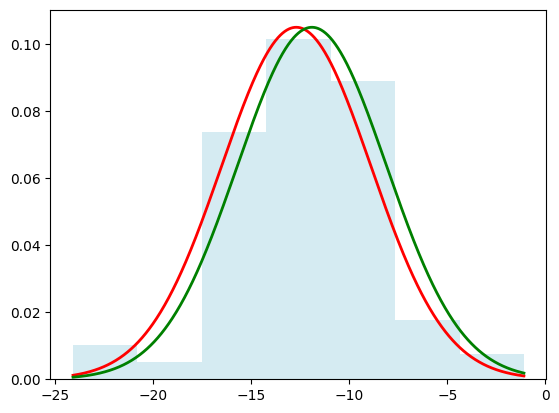

In [56]:
x = np.linspace(min(data), max(data), 1000)

plt.hist(data, bins=7, density=True, alpha=0.5, label='Гистограмма выборки', color='lightblue')
print(a0, a1)
pdf_a0 = stats.norm.pdf(x, loc=a0, scale=sigma1)
pdf_a1 = stats.norm.pdf(x, loc=a1, scale=sigma1)

plt.plot(x, pdf_a0, 'r-', label=f'Плотность N({a0}, {sigma1})', linewidth=2)
plt.plot(x, pdf_a1, 'g-', label=f'Плотность N({a1}, {sigma1})', linewidth=2)
